In [153]:
%autosave 10

Autosaving every 10 seconds




Analysis of DIJA30 companies stock prices between 2006 and 2018

all_stocks files contains data about all companies in one place whereas other files are separate for each file.
Additionally, all stocks are also summarised for year 2017. 

There are some nan values

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
from scipy import stats as st

In [39]:
df = pd.read_csv("all_stocks_2006-01-01_to_2018-01-01.csv", parse_dates=["Date"]).set_index("Date")

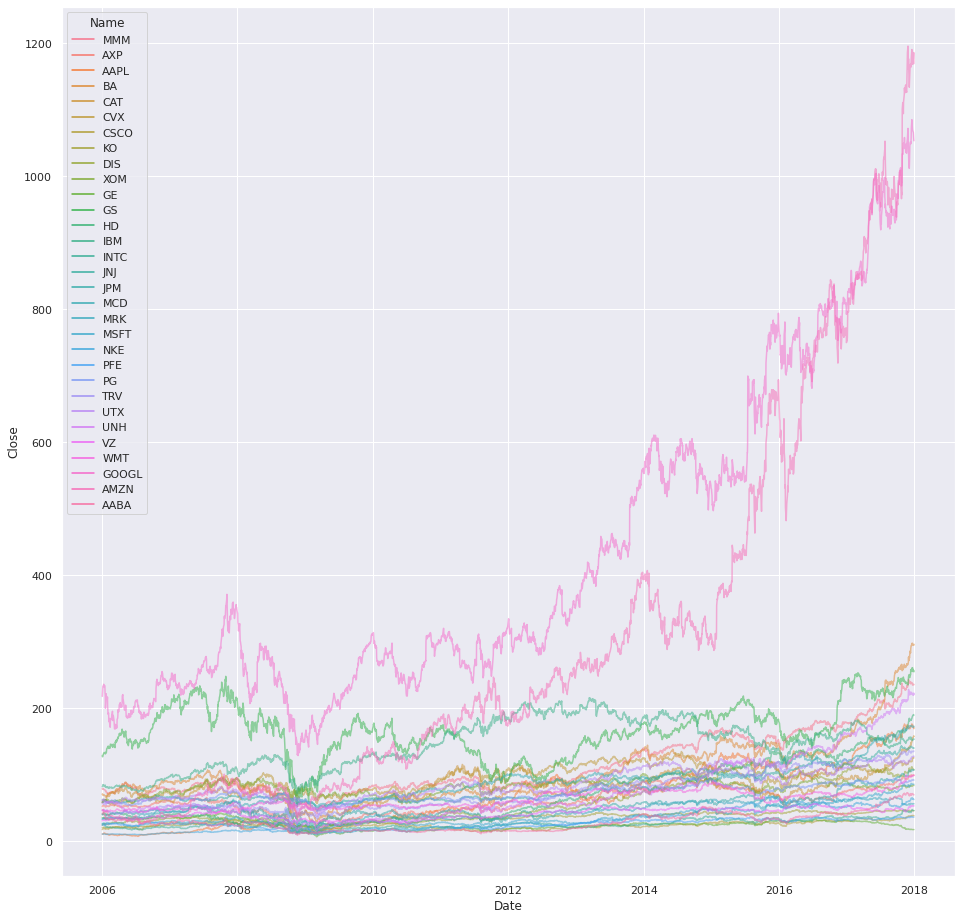

In [128]:
sns.set(rc={"figure.figsize":(16, 16)})
sns.lineplot(data=df,x='Date',y='Close',hue='Name',alpha=0.5)
sns.set(rc={"figure.figsize":(8, 8)})

In [86]:
dfu = df.set_index('Name', append=True).unstack('Name')
dfu['Close'].iplot(logy=True)

In [106]:
dfcd = dfu.diff()["Close"].dropna().resample('B').pad()
dfcdl = dfcd.shift(1).rename(columns={col:col+'_l' for col in dfcd.columns})
cor = dfcd.merge(dfcdl, how='inner',right_index=True, left_index=True).dropna().corr()

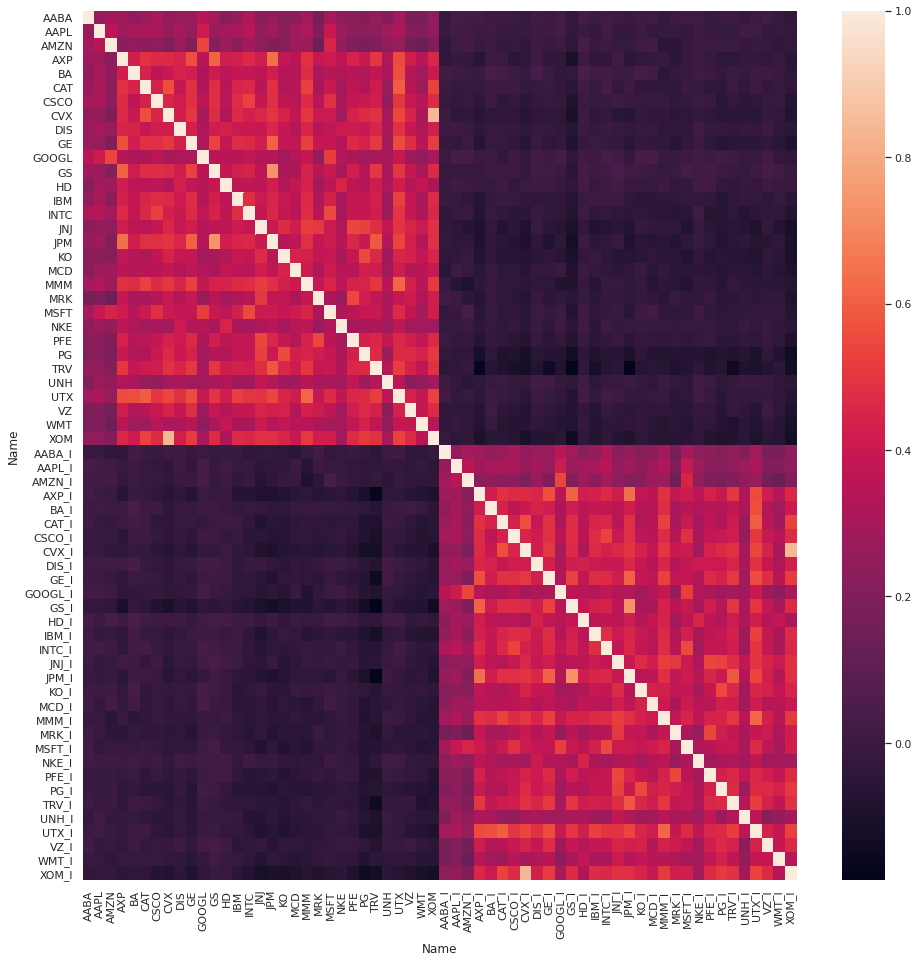

In [91]:
sns.heatmap(cor)

<IPython.core.display.Javascript object>

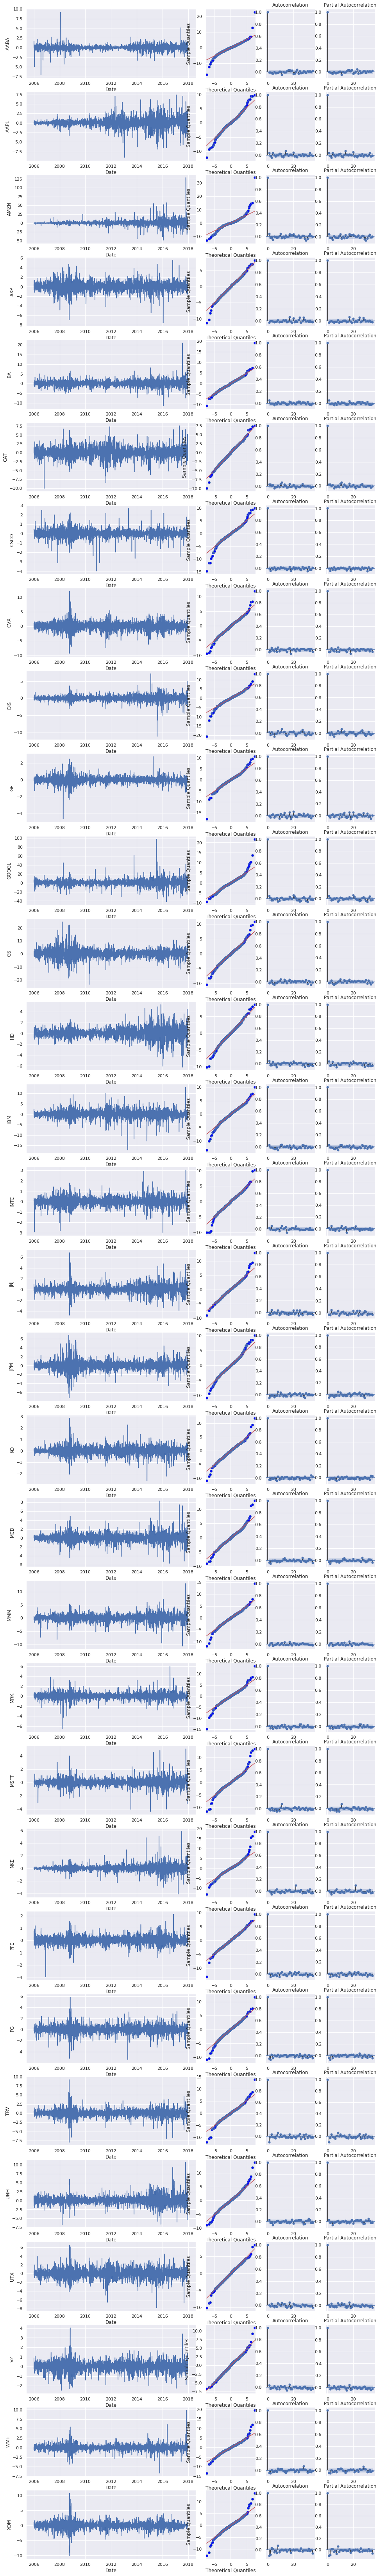

In [152]:
fig=plt.figure(figsize=(16,120))
outer_grid = fig.add_gridspec(len(dfcd.columns),1)
for i, Name in enumerate(dfcd.columns):
    inner_grid = outer_grid[i].subgridspec(1, 6)
    ax = fig.add_subplot(inner_grid[:3])
    sns.lineplot(data=dfcd[Name], ax=ax)
    ax = fig.add_subplot(inner_grid[3])
    sm.qqplot(dfcd[Name], st.laplace, ax=ax,fit=True, line="r")
    ax = fig.add_subplot(inner_grid[4])
    tsaplots.plot_acf(dfcd[Name], ax=ax)
    ax = fig.add_subplot(inner_grid[5])
    tsaplots.plot_pacf(dfcd[Name], ax=ax)
#     break

All stocks present a very similar results

QQ plot fitted for Laplace distribution as it gives much better results than normal or Cauchy distributions.

# UNUSED CODE / WORK IN PROGRESS

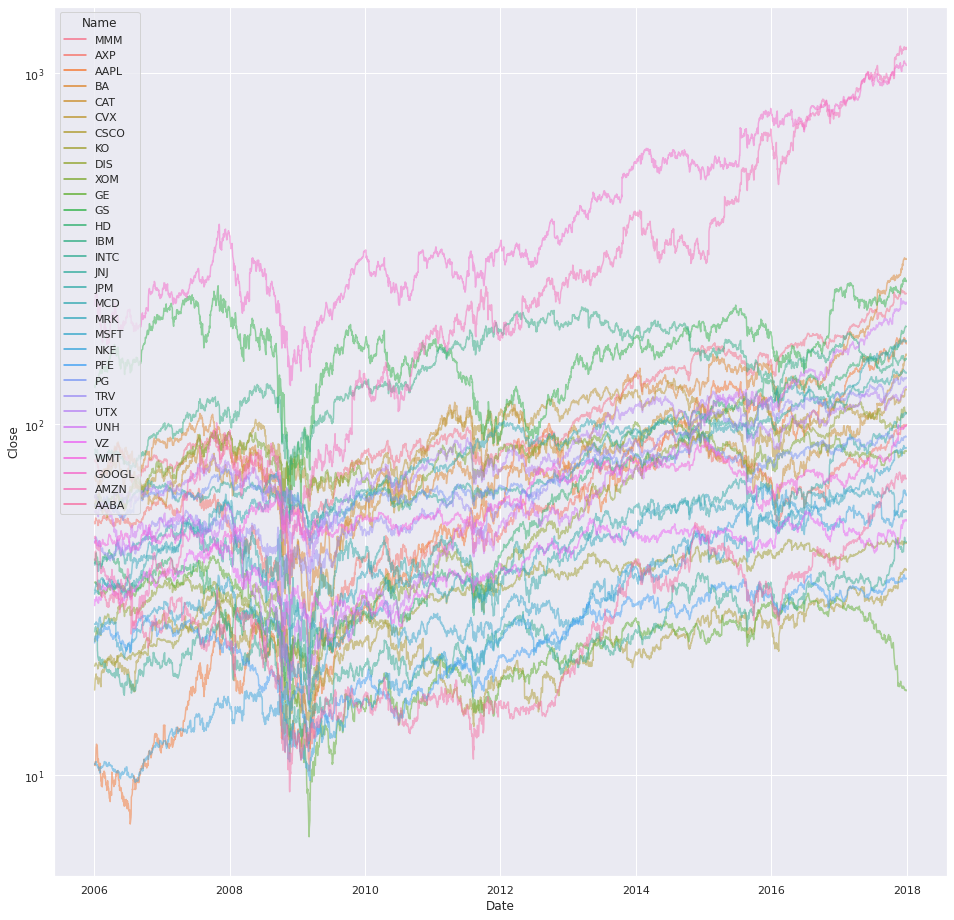

In [47]:
sns.set(rc={"figure.figsize":(16, 16)})
ax=sns.lineplot(data=df,x='Date',y='Close',hue='Name',alpha=0.5)
ax.set_yscale('log')

In [12]:
tmp=df_all[(df_all["Name"]=="AABA")]

In [10]:
AABA=pd.read_csv("AABA_2006-01-01_to_2018-01-01.csv")

In [27]:
tmp2=pd.read_csv("all_stocks_2017-01-01_to_2018-01-01.csv", parse_dates=["Date"]).set_index("Date")

In [36]:
df_all["2017":][(df_all["2017":]!=tmp2).any(1)]

Open    High     Low   Close    Volume Name
Date                                                   
2017-07-31   NaN  201.66     NaN  201.17   1833625  MMM
2017-07-31   NaN   85.70     NaN   85.23   3079797  AXP
2017-07-31   NaN     NaN     NaN  242.46   5777271   BA
2017-07-31   NaN     NaN     NaN  113.95   4486013  CAT
2017-07-31   NaN  110.00     NaN  109.19   7561205  CVX
2017-07-31   NaN     NaN   45.79   45.84  13622891   KO
2017-07-31   NaN  110.14     NaN  109.93   6815349  DIS
2017-07-31   NaN   80.39     NaN   80.04  12820175  XOM
2017-07-31   NaN   25.69     NaN   25.61  30616287   GE
2017-07-31   NaN  225.50     NaN  225.33   1999637   GS
2017-07-31   NaN  149.98     NaN  149.60   5253318   HD
2017-07-31   NaN  144.93     NaN  144.67   4355718  IBM
2017-07-31   NaN  133.58     NaN  132.72   5440788  JNJ
2017-07-31   NaN   92.36     NaN   91.80  11520329  JPM
2017-07-31   NaN     NaN  154.85  155.14   4280364  MCD
2017-07-31   NaN     NaN   63.51   63.88  11714888  MRK
2017-07-31   NaN   59.12   58.33   59.05   6225907  NKE
2017-07-31   NaN     NaN     NaN   33.16  21982573  PFE
2017-07-31   NaN   91.07     NaN   90.82   7835661   PG
2017-07-31   NaN     NaN     NaN  128.09   1077258  TRV
2017-07-31   NaN  119.34  118.44  118.57   2172327  UTX
2017-07-31   NaN     NaN     NaN  191.81   3776476  UNH
2017-07-31   NaN   48.57     NaN   48.40  28456827   VZ
2017-07-31   NaN     NaN     NaN   79.99   6263189  WMT

In [37]:
tmp2[(df_all["2017":]!=tmp2).any(1)]

Open    High     Low   Close    Volume Name
Date                                                   
2017-07-31   NaN  201.66     NaN  201.17   1833625  MMM
2017-07-31   NaN   85.70     NaN   85.23   3079797  AXP
2017-07-31   NaN     NaN     NaN  242.46   5777271   BA
2017-07-31   NaN     NaN     NaN  113.95   4486013  CAT
2017-07-31   NaN  110.00     NaN  109.19   7561205  CVX
2017-07-31   NaN     NaN   45.79   45.84  13622891   KO
2017-07-31   NaN  110.14     NaN  109.93   6815349  DIS
2017-07-31   NaN   80.39     NaN   80.04  12820175  XOM
2017-07-31   NaN   25.69     NaN   25.61  30616287   GE
2017-07-31   NaN  225.50     NaN  225.33   1999637   GS
2017-07-31   NaN  149.98     NaN  149.60   5253318   HD
2017-07-31   NaN  144.93     NaN  144.67   4355718  IBM
2017-07-31   NaN  133.58     NaN  132.72   5440788  JNJ
2017-07-31   NaN   92.36     NaN   91.80  11520329  JPM
2017-07-31   NaN     NaN  154.85  155.14   4280364  MCD
2017-07-31   NaN     NaN   63.51   63.88  11714888  MRK
2017-07-31   NaN   59.12   58.33   59.05   6225907  NKE
2017-07-31   NaN     NaN     NaN   33.16  21982573  PFE
2017-07-31   NaN   91.07     NaN   90.82   7835661   PG
2017-07-31   NaN     NaN     NaN  128.09   1077258  TRV
2017-07-31   NaN  119.34  118.44  118.57   2172327  UTX
2017-07-31   NaN     NaN     NaN  191.81   3776476  UNH
2017-07-31   NaN   48.57     NaN   48.40  28456827   VZ
2017-07-31   NaN     NaN     NaN   79.99   6263189  WMT

In [21]:
(tmp.reset_index(drop=True)==AABA).all().all()

True

In [19]:
tmp.reset_index(drop=True).head()

Date   Open   High    Low  Close    Volume  Name
0  2006-01-03  39.69  41.22  38.79  40.91  24232729  AABA
1  2006-01-04  41.22  41.90  40.77  40.97  20553479  AABA
2  2006-01-05  40.93  41.73  40.85  41.53  12829610  AABA
3  2006-01-06  42.88  43.57  42.80  43.21  29422828  AABA
4  2006-01-09  43.10  43.66  42.82  43.42  16268338  AABA

In [15]:
AABA.head()

Date   Open   High    Low  Close    Volume  Name
0  2006-01-03  39.69  41.22  38.79  40.91  24232729  AABA
1  2006-01-04  41.22  41.90  40.77  40.97  20553479  AABA
2  2006-01-05  40.93  41.73  40.85  41.53  12829610  AABA
3  2006-01-06  42.88  43.57  42.80  43.21  29422828  AABA
4  2006-01-09  43.10  43.66  42.82  43.42  16268338  AABA